# **Linear Regression**

**Regression models leverage features to analyze relationships between continuous variables and an output variable. They identify patterns in existing data and use them to predict values for new data points.**



*   **Objective:** Predict continuous numerical values based on input features.
*   **Output:** Real numbers (e.g., house prices, temperature, sales revenue).
*   **Example:** Estimating house prices based on size, location, number of rooms, and other attributes.






# Case Senario: CAR DEKHO

# 🚗 CarDekho: Revolutionizing Car Buying & Selling Since 2008



Founded by Amit Jain and Anurag Jain, CarDekho is India’s 1 automotive platform, making car buying and selling effortless. Whether it's a brand-new ride or a pre-owned gem, CarDekho provides everything you need—right at your fingertips!

🔹 **Why CarDekho?**

✅ **Expert Reviews & Comparisons** – Make informed decisions with detailed insights.

✅ **Best Prices & Offers** – Get the most competitive deals on new & used cars.


✅ **360° Car Views** – Experience cars like never before!

✅ **Easy Financing & Insurance** – Seamless partnerships with top banks & insurers.

🌍 **Global Expansion:** Now driving success in Southeast Asia & the UAE 🚀

💰 **Valuation**: Over $1 billion & growing!

**CarDekho – Your Ultimate Car Buying Companion! 🚘✨**

#Problem Statement:

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate
wildly based on a variety of factors including the make and model of the car, its mileage, its
condition and the current market conditions. As a result, it can be difficult for sellers to
accurately price their cars


# Approach:

We aim to build a powerful **machine learning model** designed to accurately predict the price of a used car based on its unique features. By leveraging a vast dataset of previously sold vehicles from **CarDekho.com**, the model will learn the intricate patterns that influence car pricing in India’s dynamic market.  

This intelligent system will analyze factors such as **brand, model, mileage, condition, and market trends**, allowing it to generate highly precise price estimates for any used car. Whether you're a buyer looking for the best deal or a seller wanting to price your car competitively, this model will bring **data-driven accuracy** to the process, ensuring fair valuations and seamless transactions.

# Objective

To predict Car Price using Machine Learning Model.

# Benefits:

This solution brings **transformative benefits** to the used car market, creating a more seamless and efficient experience for both buyers and sellers.  

Sellers will gain the ability to **accurately price their cars**, ensuring quicker sales at **optimal prices**. Buyers, in turn, will discover **fairly priced vehicles**, making the purchasing process more transparent and rewarding. As a result, the **entire used car ecosystem in India** will operate more efficiently, fostering **trust, better deals, and smarter transactions** for everyone involved.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#Load the dataset
data = "Cardekho.csv"
df =pd.read_csv(data)

# Check the first few rows of the dataset
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
# Check the shape of the data (rows and columns)
df.shape

(15411, 14)

In [6]:
# Data cleaning: Drop unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
#Checking null values
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [8]:
# Checking Duplicate values
df.duplicated().sum()

167

In [9]:
# Statistical summary of numerical columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# **Exploratory Data Analysis (EDA)**

# Univariate Analysis (Examining individual variables)

Univariate analysis focuses on examining the **distribution of individual features**, providing valuable insights into the dataset. By analyzing each feature separately, it helps identify **outliers, central tendencies (mean, median, mode), and overall data distribution**.  

Understanding these patterns allows for **better decision-making**, enabling data preprocessing steps such as **handling skewness, missing values, or anomalies**, ultimately leading to more accurate and reliable models.

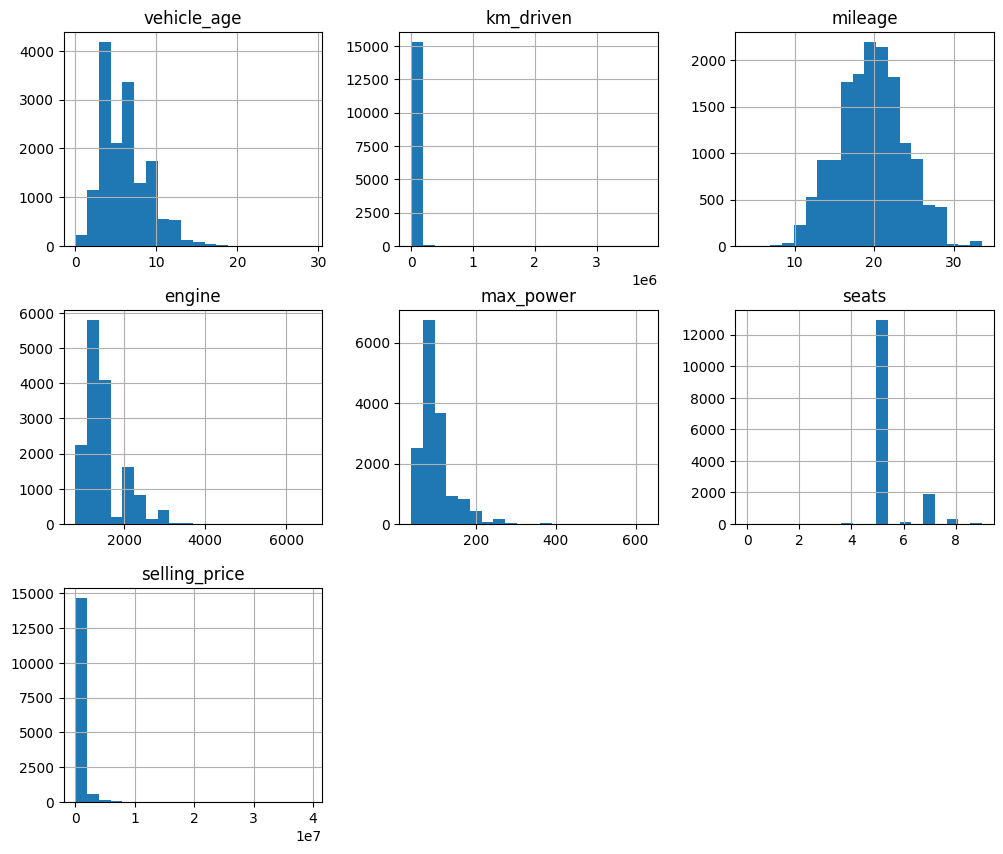

In [10]:
# Plot histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

In [11]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

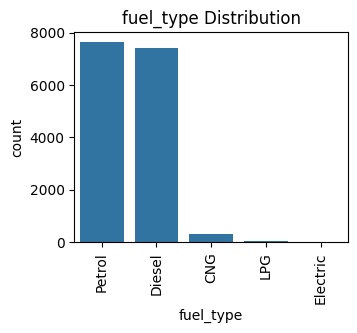

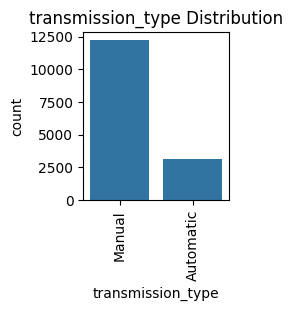

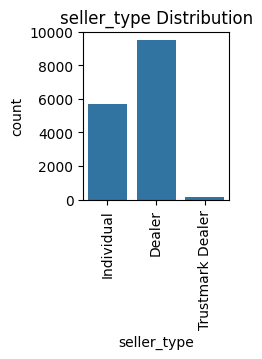

In [12]:
# Categorical features
categorical_features = ["fuel_type", "transmission_type", "seller_type"]
plt.figure(figsize=(12, 6))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation = 90)
    plt.show()

# Bivariate Analysis (Examining the relationship between two variables)

We examine the relationship between the target variable (selling_price) and other features. This step typically helps in understanding which features have strong correlations with the target variable.

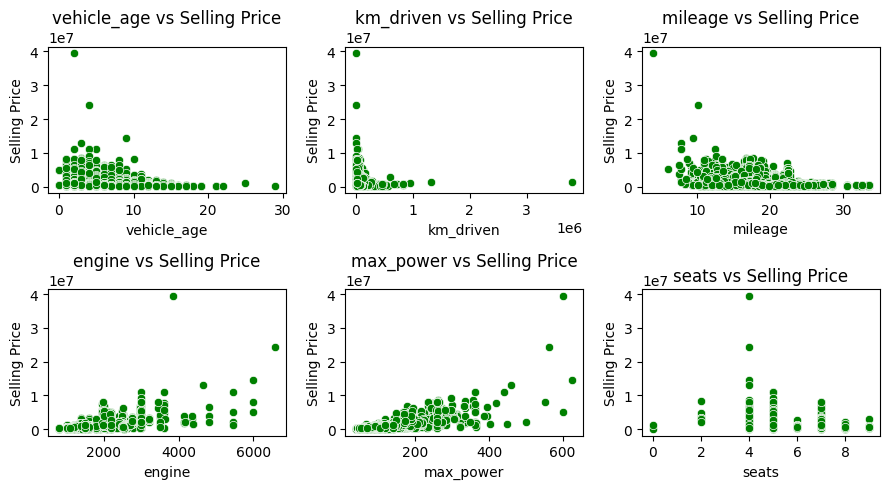

In [13]:
# Numerical features
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Create subplots for scatter plots
plt.figure(figsize=(9,5))

# Scatter plot for each numerical feature vs selling price
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['selling_price'], color='green')
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

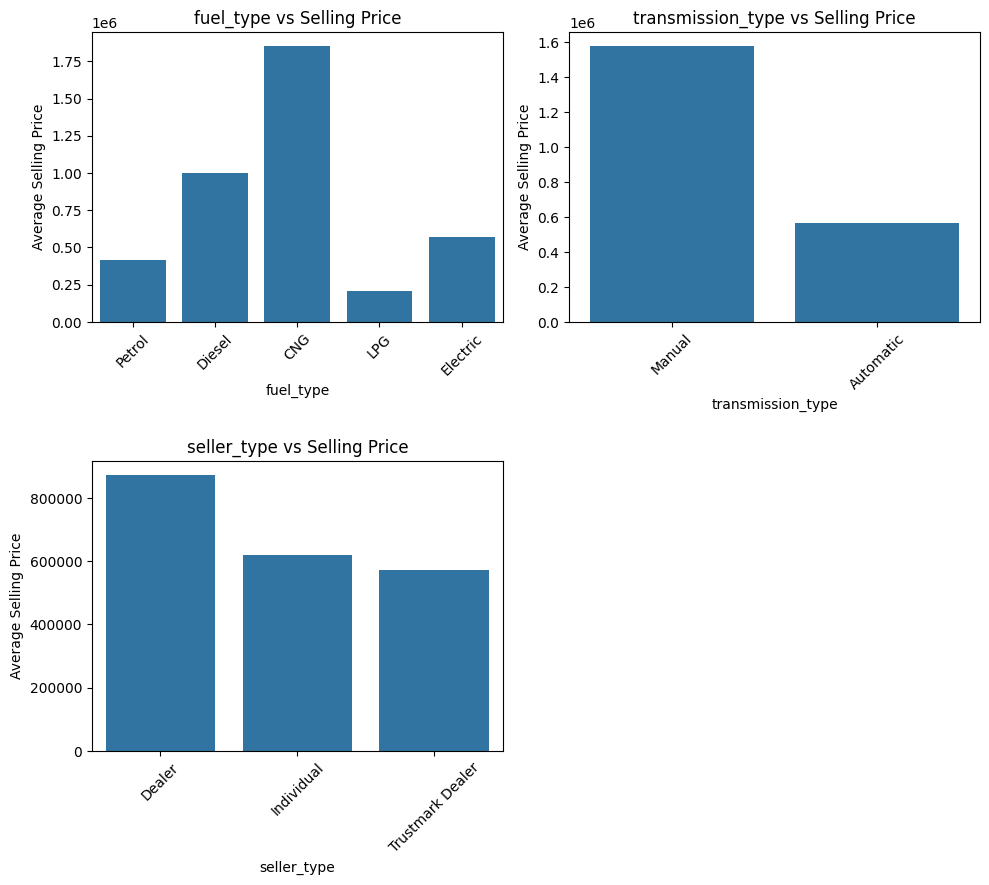

In [14]:
# Categorical features to analyze
categorical_features = ['fuel_type', 'transmission_type', 'seller_type']

# Set figure size for the plots
plt.figure(figsize=(10,12))

# Create subplots for bar plots of categorical features vs selling price
for i, feature in enumerate(categorical_features):
    plt.subplot(3,2, i +1)
    sns.barplot(x=df[feature].value_counts().index,
                y=df.groupby(feature)['selling_price'].mean().values)
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Average Selling Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Multivariate Analysis (Correlation between multiple variables)

In [15]:
# List of numerical features you want to calculate correlation for
numerical_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Calculate the correlation matrix for selected numerical features
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

               vehicle_age  km_driven   mileage    engine  max_power  \
vehicle_age       1.000000   0.333891 -0.257394  0.098965   0.005208   
km_driven         0.333891   1.000000 -0.105239  0.192885   0.044421   
mileage          -0.257394  -0.105239  1.000000 -0.632987  -0.533128   
engine            0.098965   0.192885 -0.632987  1.000000   0.807368   
max_power         0.005208   0.044421 -0.533128  0.807368   1.000000   
seats             0.030791   0.192830 -0.440280  0.551236   0.172257   
selling_price    -0.241851  -0.080030 -0.305549  0.585844   0.750236   

                  seats  selling_price  
vehicle_age    0.030791      -0.241851  
km_driven      0.192830      -0.080030  
mileage       -0.440280      -0.305549  
engine         0.551236       0.585844  
max_power      0.172257       0.750236  
seats          1.000000       0.115033  
selling_price  0.115033       1.000000  


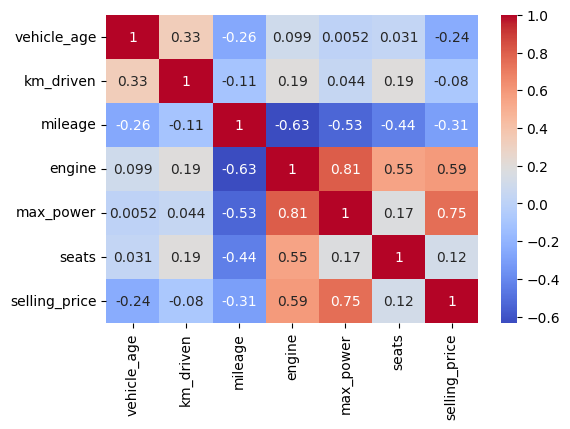

In [16]:
#Plot the heatmap for checking the correlation
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 🔍 Correlation Insights: Understanding What Drives Used Car Prices
**🚗 Vehicle Age vs. Selling Price**


*   **📉 Negative correlation (-0.24):** Older cars tend to have lower resale value.

**🛣️ Kilometers Driven vs. Selling Price**

* **📉 Weak negative correlation (-0.08)**: Mileage has a minor impact on price.


**⛽ Mileage vs. Selling Price**
* **📉 Moderate negative correlation (-0.31)**: Lower mileage cars generally sell for higher prices.

**⚙️ Engine Capacity vs. Selling Price**
* **📈 Moderate positive correlation (0.59)**: Bigger engines often command higher prices.

**⚡ Max Power vs. Selling Price**
* **📈 Strong positive correlation (0.75):** Cars with more power tend to be valued higher.

**🛋️ Seats vs. Selling Price**
* **📈 Weak positive correlation (0.12)**: Number of seats has minimal impact on price.

# 🔑 Additional Key Insights
* **🔹 Mileage & Engine Capacity: Strong negative correlation (-0.63)** – More engine power often means lower mileage.
* **🔹 Mileage & Max Power: Moderate negative correlation (-0.53)** – High-power cars tend to have lower mileage efficiency.

# 📌 Conclusion
* ✅ Max Power is the strongest predictor of selling price.
* ✅ Vehicle age, mileage, and kilometers driven negatively impact car prices, as expected.

📊 Understanding these relationships helps in setting the right price for used cars, making buying and selling smarter and more efficient! 🚀

# Data Preprocessing

After completing **Exploratory Data Analysis (EDA)**, the next crucial steps involve refining and transforming the dataset to enhance model performance.  

* 🔹 **Remove Irrelevant Features**  
Columns that don’t contribute to predicting the target variable should be **dropped** to avoid noise and improve model efficiency.  

* 🔹 **Encode Categorical Variables**  
Features like **fuel type, transmission type, and seller type** need to be **converted into numerical values** (e.g., using **One-Hot Encoding or Label Encoding**) to make them machine-readable.  

* 🔹 **Split Data for Training & Testing**  
To evaluate model performance, the dataset is divided into:  
✅ **Training Set (e.g., 80%)** – Used to train the model.  
✅ **Testing Set (e.g., 20%)** – Used to assess model accuracy on unseen data.  

📊 **With these preprocessing steps, the dataset becomes well-structured, ensuring better predictions and reliable insights!** 🚀

In [17]:
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [18]:
# Drop irrelevant columns
model_data.drop(labels = ['car_name','brand','model','seller_type'],axis = 1, inplace = True)

In [19]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### **Understanding Features (X) and Target (y) in Supervised Learning**  

In any **supervised learning task**, the dataset is divided into two key components:  

🔹 **Features (X):**  
These are the **input variables** that the model uses to predict the target. For predicting **house prices**, the features could include:  
- **Number of bedrooms**  
- **Square footage of the living area**  
- **Lot size**  
- **Age of the house**  
- **Location** (postal code, latitude, longitude, etc.)  

🔹 **Target (y):**  
This is the **output variable** you want the model to predict. In this case, the target is the **Price of the house**.



### **Why Split the Dataset?**  

In **supervised learning**, the goal is to use **features (X)** to predict the **target (y)**. By splitting the dataset into features and target, you allow the model to learn the relationship between them:  

- **Features (X):** These are the **predictors** (independent variables) that help the model recognize patterns or relationships influencing the target variable. They provide the input needed to make predictions.  
- **Target (y):** This is the **variable we aim to predict**. The model will learn to map the features (inputs) to the correct output, in this case, the **house price**.  

By separating these components, we give the model clear inputs and outputs, enabling it to learn and generalize effectively.

In [20]:
# Define features (X) and target (Y)
X = model_data.drop('selling_price', axis=1)  # Independent variables
Y = model_data['selling_price']  # Target variable

#Splitting the Data into Training and Test Sets
It’s important to separate the data into training and testing sets to evaluate the performance of the model.

In [21]:
# Split data into training (80%) and testing (20%) sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

print(f"Training set size: {train_X.shape}, Testing set size: {test_X.shape}")
X = model_data.drop('selling_price', axis = 1)

Training set size: (12328, 13), Testing set size: (3083, 13)


# Train the Regression Model

In [22]:
# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(train_X, train_Y)

# Predict on the test data
predictions = regressor.predict(test_X)

# Show the first few predicted values
print(predictions[:5])

[970129.57662985 614364.45500117 541557.21857516 655122.37504933
 516812.33199097]


In [23]:
print(test_Y)

7598     750000
567      650000
3465     395000
634      410000
5327     500000
          ...  
15162    300000
3814     650000
9784     450000
5096     350000
10104    425000
Name: selling_price, Length: 3083, dtype: int64


In [24]:
test_X['predicted_sales_price'] = predictions

test_X['Actual_price'] = test_Y

test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

In [25]:
test_X

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_sales_price,Actual_price,difference
7598,3,50000,17.00,1198,108.50,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,970129.576630,750000,220129.576630
567,4,30000,21.21,1197,81.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,614364.455001,650000,-35635.544999
3465,2,10695,23.01,999,67.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,541557.218575,395000,146557.218575
634,7,144000,26.00,1498,98.60,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,655122.375049,410000,245122.375049
5327,5,27735,18.90,1197,81.86,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,516812.331991,500000,16812.331991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,15,70000,13.93,2956,138.10,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,875397.000277,300000,575397.000277
3814,7,63762,25.10,1498,98.60,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,743344.895529,650000,93344.895529
9784,5,20000,21.21,1197,81.80,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,565260.858708,450000,115260.858708
5096,3,30000,25.17,799,53.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,254778.514136,350000,-95221.485864


#**Model Evaluation**

### **1. Mean Squared Error (MSE)**  

**What is MSE?**  
Mean Squared Error (MSE) measures the average of the squared differences between the predicted and actual values. It evaluates how far off the predictions are, and by squaring the errors, it penalizes larger discrepancies more heavily.

**Why Use MSE?**  
- **Penalizes Larger Errors:** The squaring of errors ensures larger deviations from the actual values receive higher penalties.  
- **Simple and Effective:** MSE gives a clear evaluation metric for model performance, with **lower values indicating better accuracy**.

**Formula:**  
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:  
$$
 (y_i): True value,   
 (\hat{y}_i): Predicted value ,
 (n): Number of observations
$$
**Interpretation:**  
- **Low MSE**: Indicates that the model’s predictions are close to actual values.  
- **High MSE**: Signals that the model's predictions are far from the true values.  
- **Unit**: The unit of MSE is the square of the target variable’s unit, making it less interpretable than RMSE.

---

### **2. Root Mean Squared Error (RMSE)**  

**What is RMSE?**  
Root Mean Squared Error (RMSE) is simply the square root of MSE. It expresses the error in the same units as the target variable, making it more **interpretable** than MSE.

**Why Use RMSE?**  
- **Intuitive**: RMSE presents errors in the **same units** as the target variable, which makes it easier to understand.  
- **Magnitude of Error**: It provides a clearer idea of the **typical error magnitude**.

**Formula:**  
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

**Interpretation:**  
- **Lower RMSE**: Indicates better prediction accuracy, as it reflects the **typical prediction error**.  
- **Higher RMSE**: Suggests that there are larger errors in the model's predictions.  
- **Unit**: Same as the target variable, making it more interpretable than MSE.

**Why RMSE over MSE?**  
While MSE tells you the average squared error, RMSE scales this error to the **same units** as the target variable, making it easier to relate to the problem (e.g., INR for car prices).

---

### **3. R-squared (R²)**  

**What is R-squared?**  
R-squared measures the **proportion of variance** in the target variable explained by the features in the model. It is a relative metric, ranging from 0 to 1 (or even negative if the model performs worse than a baseline).

**Why Use R-squared?**  
- **Explains Variance**: It shows how well the **independent variables** explain the variability in the **dependent variable**.  
- **Model Fit**: A higher R² value indicates a better fit and explains more of the variance in the target.

**Formula:**  
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Where:
$$
(y_i): True value  
(\hat{y}_i): Predicted value  
(\bar{y}): Mean of actual values
$$
**Interpretation:**  
- **R² = 1**: Perfect fit – the model explains all of the variance in the target variable.  
- **R² = 0**: No explanatory power – the model doesn’t explain any of the variance, equivalent to predicting the mean.  
- **R² < 0**: Worse than the mean predictor – the model performs poorly.

---

### **Why Use All Three Metrics?**  
- **MSE**: Focuses on the **absolute size** of the error and penalizes larger errors more.  
- **RMSE**: **Scales** the error to the same unit as the target variable for **easier interpretation**.  
- **R-squared**: Provides insight into how well the model **explains variance** and fits the data.  

Together, these metrics offer a comprehensive understanding of a model’s **accuracy, error magnitude, and explanatory power**, allowing for better decision-making in model evaluation and improvement.

In [26]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(test_Y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_Y,predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 214718286290.9368
Root Mean Squared Error (RMSE): 463377.0454942031
R-squared: 0.662493706390948


### **Model Evaluation Metrics:**


#### **1. Mean Squared Error (MSE): 204,566,383,684.88**  
MSE measures the average squared difference between the predicted and actual values. In this case, the value is quite large.

- **Interpretation**: A large MSE (204,566,383,684.88) indicates that the model's predictions are far from the true values. However, due to the squaring, it overemphasizes larger errors, making the result less interpretable directly.
- **Why it Matters**: MSE provides an overall indication of how far off the model's predictions are from actual values. The higher the MSE, the worse the model's performance in terms of making accurate predictions.



#### **2. Root Mean Squared Error (RMSE): 452,290.15**  
RMSE is the square root of MSE, offering a more interpretable error value in the same units as the target variable.

- **Interpretation**: An RMSE of ₹452,290.15 suggests that, on average, the model’s predictions are off by ₹452,290.15 for each prediction. Since it’s in the same unit (INR) as the target (car prices), this value is easier to understand and work with.
- **Why it Matters**: A lower RMSE means the model's predictions are closer to actual values. The goal is to minimize RMSE to improve the model's performance and accuracy.


#### **3. R-squared (R²): 0.6731 (or 67.31%)**  
R-squared measures the proportion of the variance in the target variable (selling price) explained by the model. It indicates how well the model fits the data.

- **Interpretation**: An R² value of **0.6731** means the model explains **67.31%** of the variance in car prices, leaving **32.69%** unexplained. This indicates that while the model captures a significant portion of the variance, there’s still room for improvement.
- **Why it Matters**: A higher R² generally indicates better model performance. In predicting something as variable as car prices, an R² of 0.67 is decent, although improvements could be made to explain more variance.



#**Visualizing the Predictions**

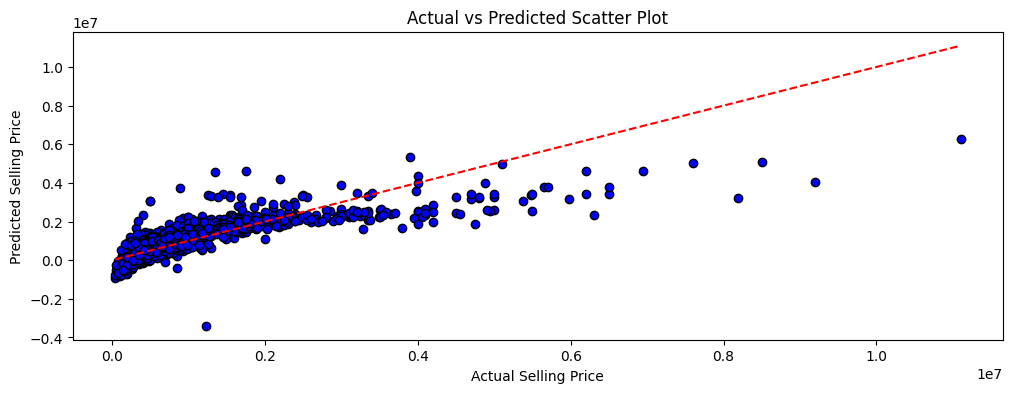

In [27]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(test_Y, predictions, color='blue',edgecolor='black')
plt.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

**The red dashed line represents the ideal line (where predicted values exactly match actual values). The scatter points show how close your predictions are to the actual prices. The closer the points are to the red line, the better the model.**

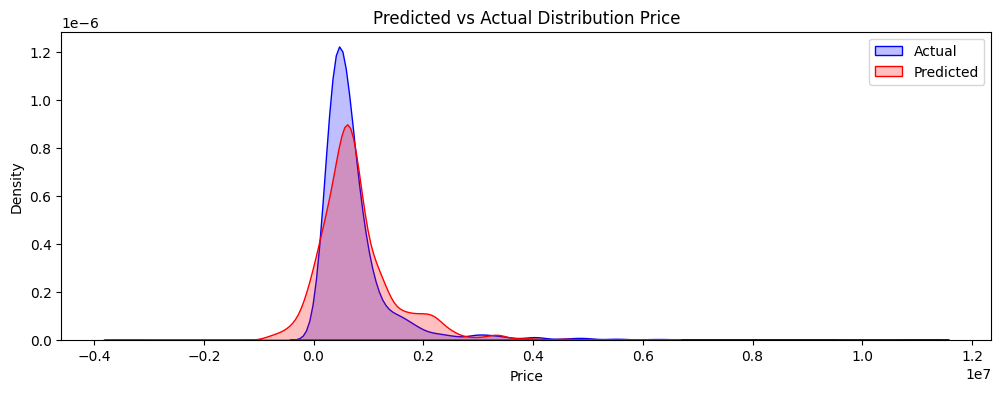

In [28]:
# Plotting Actual vs Predicted Distribution Price
plt.figure(figsize=(12,4))
sns.kdeplot(test_Y, color='blue', label='Actual', fill=True)
sns.kdeplot(predictions, color='red', label='Predicted', fill=True)
plt.title('Predicted vs Actual Distribution Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

**In a good model, the predicted price distribution should closely match the actual price distribution. Any significant difference suggests the model isn't capturing the distribution of prices well.**